In [1]:
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split



import math

In [2]:
dataset = "dataset"
images = "images"
#dataset icindeki gifleri jpg cevir siyah beyaz yap images a kaydet
for root, dirs, files in os.walk(dataset):
    for file in files:
        if file.endswith(".gif"):
            gif = cv2.VideoCapture(os.path.join(root, file))
            ret, frame = gif.read()

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            #200 piksel  siyah cerceve ekle
            frame = cv2.copyMakeBorder(gray, 200, 200, 200, 200, cv2.BORDER_CONSTANT, value=[0, 0, 0])

            # beyaz noktalar resmin tam sinirinda oldugunda conturde hata olmasin diye 
        
            if ret:
                cv2.imwrite(os.path.join(images, file[:-4] + ".jpg"), frame)
            else:
                print("Error") 

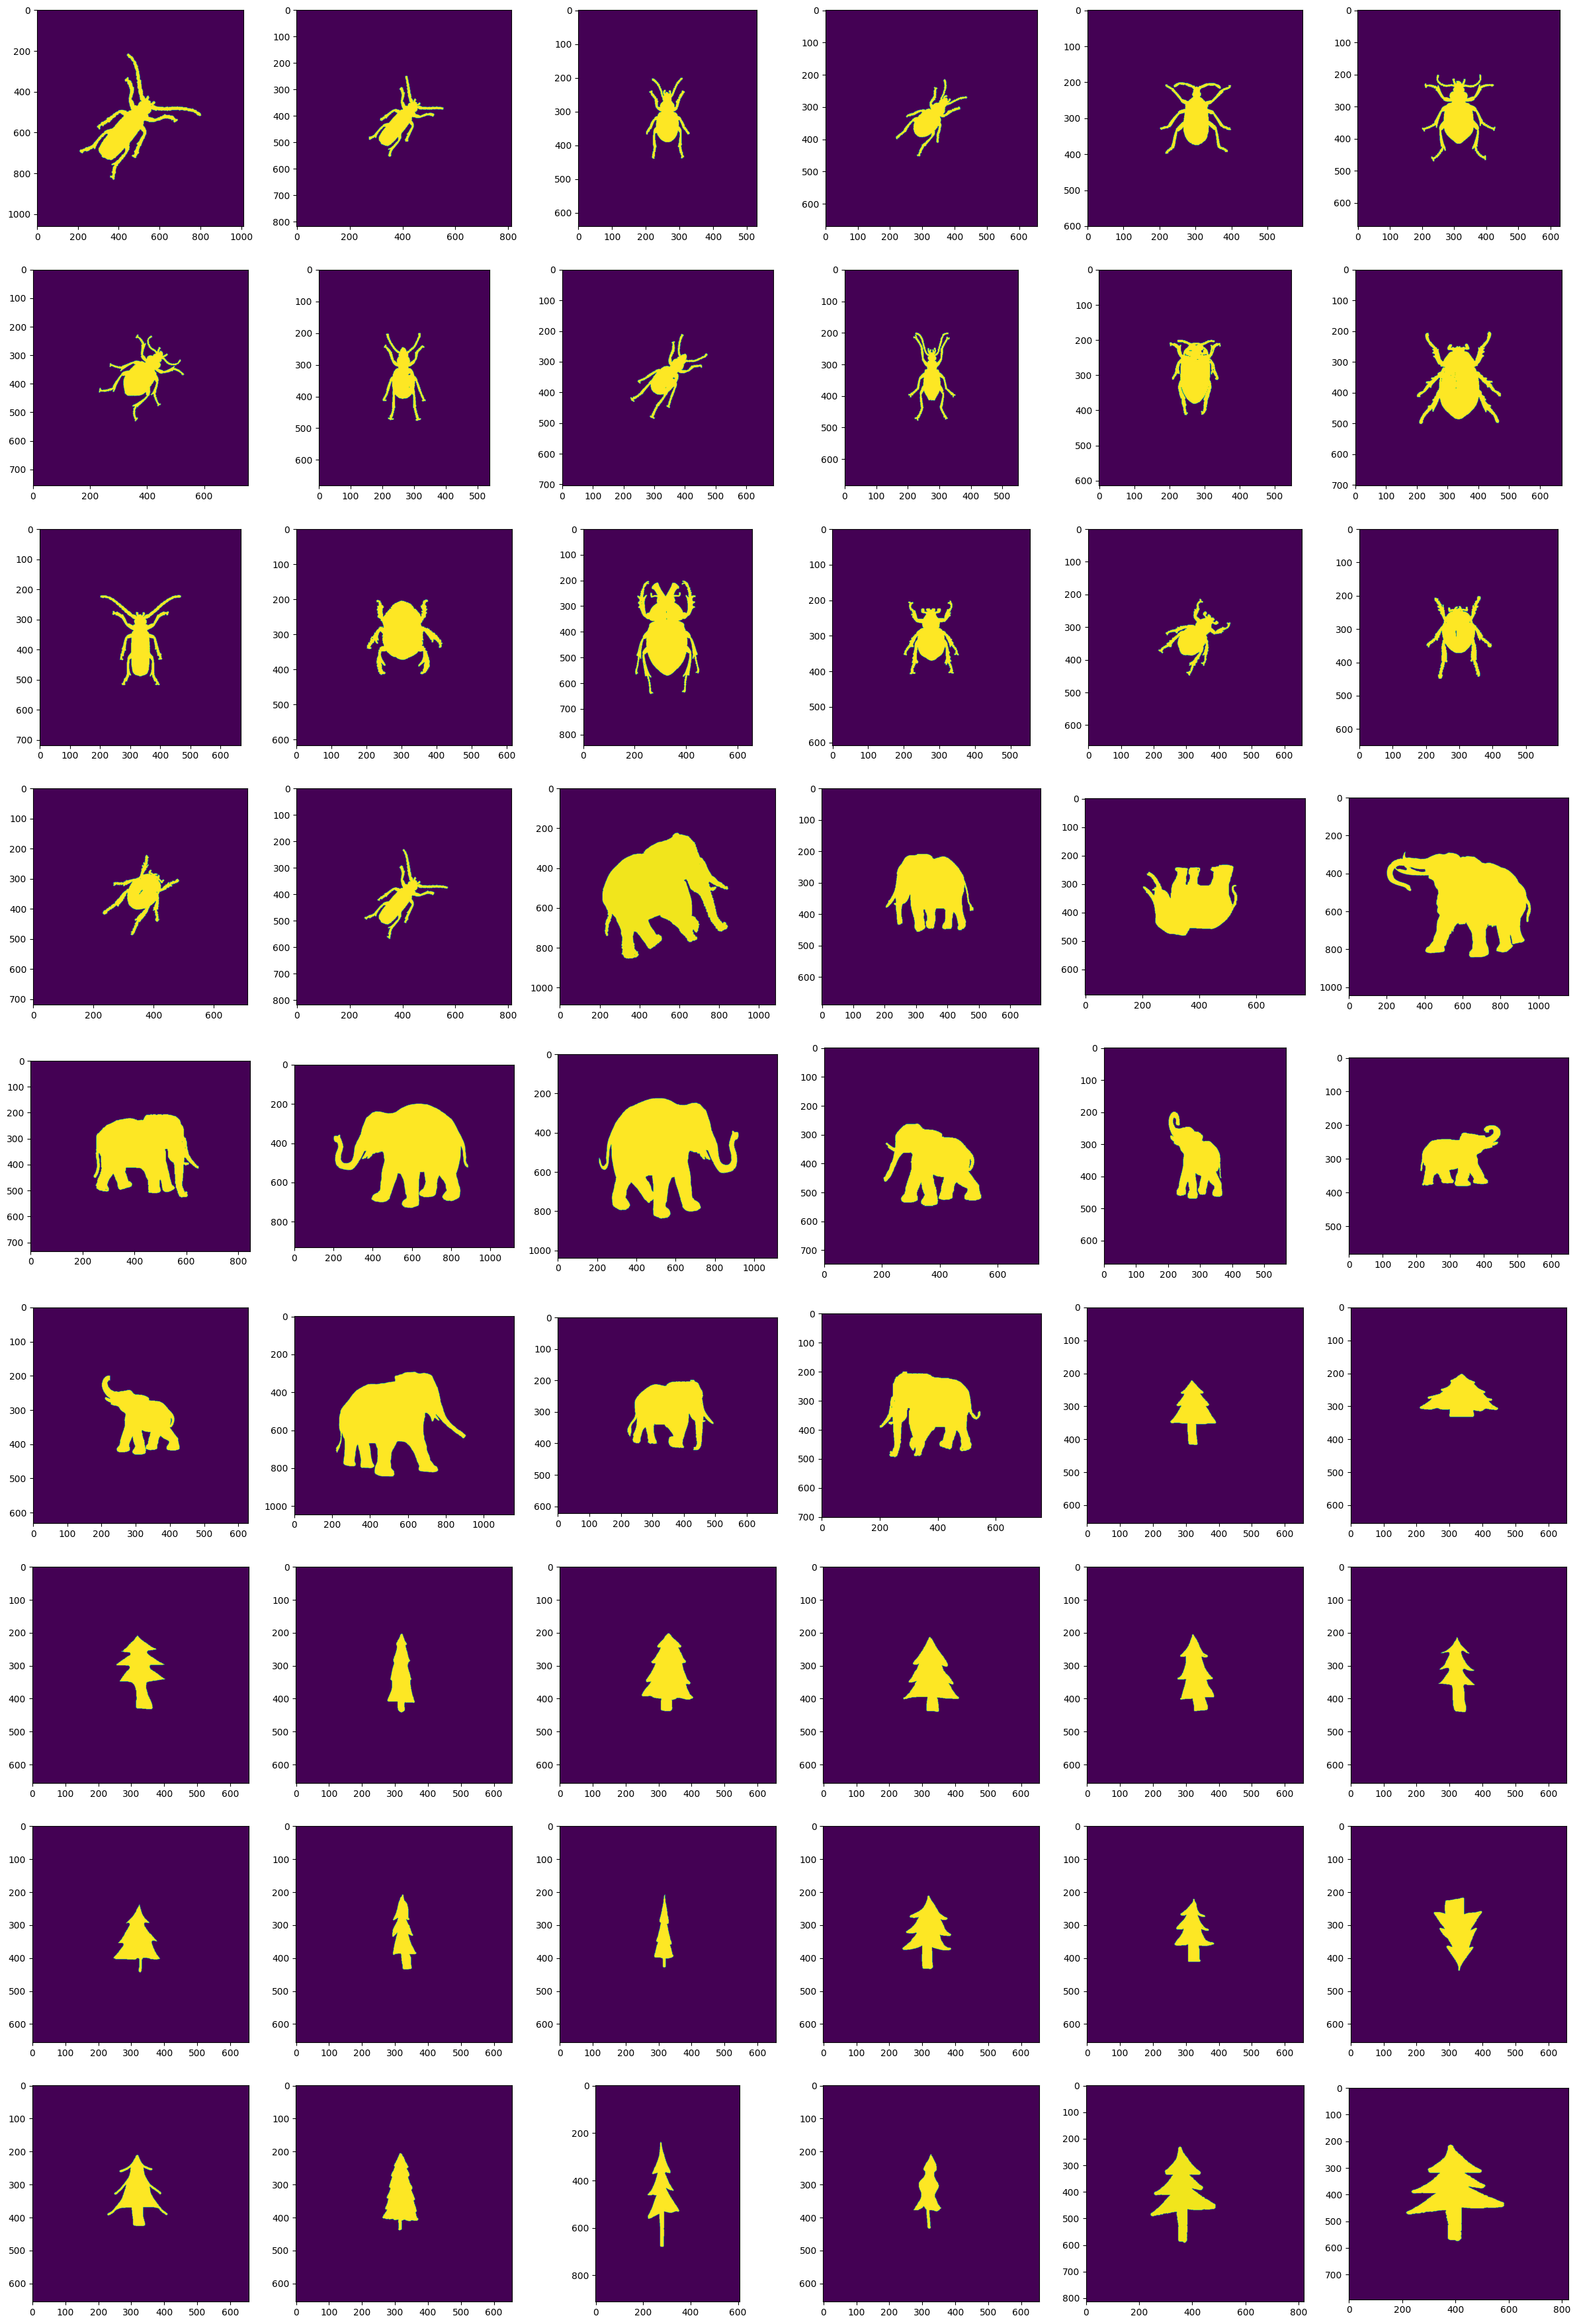

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

len(os.listdir(images))
plt.figure(figsize = (30,45))
#images icindeki tum resimleri oku

for i in range (len(os.listdir(images))):
    img = mpimg.imread(os.path.join(images, os.listdir(images)[i]))
    plt.subplot(9, 6, i+1)
    plt.imshow(img)
    
#save
plt.savefig("images.png")

In [4]:
# Create an empty dataframe to store the results
df = pd.DataFrame(columns=["Image","Label", "ellipticity",  "elongation",
 "circularity", "sphericity", "convexity", "solidity", "rectangularity"])


# Set the directory path
folder_path = "images"

In [5]:

# Iterate through the files in the directory
for file in os.listdir(folder_path):
    if file.endswith(".jpg"):
        # Read the image
        image = cv2.imread(folder_path + "/" + file)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

       
        # Threshold the image to binary
        _, threshold = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

        # Find the contours in the image
        contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
      
        

        # Iterate through the contours
        for contour in contours:
            # Calculate the center of the contour
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Calculate the perimeter of the contour
            perimeter = cv2.arcLength(contour, True)

            # Calculate the area of the contour
            area = cv2.contourArea(contour)

            # Calculate the major and minor axis of the contour
            (x, y), (MA, ma), angle = cv2.fitEllipse(contour)

            # Calculate the ellipticity
            ellipticity = (MA ** 2) / (ma ** 2)

            # Calculate the elongation
            elongation = (MA / ma) ** 2

            
            # Calculate the circularity
            circularity = (4 * math.pi * area) / (perimeter ** 2)

            # Calculate the sphericity
            sphericity = (math.pi * (3 / 4) * (ma / 2) ** 2) / area

            # Calculate the convexity
            convex_area = cv2.contourArea(cv2.convexHull(contour))
            convexity = area / convex_area

            # Calculate the solidity
            solidity = area / convex_area

             # Calculate the rectangularity
            rect = cv2.minAreaRect(contour)
            rect_area = rect[1][0] * rect[1][1]
            rectangularity = area / rect_area

            
            # Get the image label
            if "beetle" in file:
                label = "beetle"
            elif "elephant" in file:
                label = "elephant"
            elif "tree" in file:
                label = "tree"
            else :
                label = 'unknown'

            # Append the results to the dataframe
            df = df.append({"Image": file,"Label":label, "ellipticity": ellipticity, 
            "elongation": elongation, "circularity": circularity, 
            "sphericity": sphericity, "convexity": convexity,
             "solidity": solidity, "rectangularity": rectangularity}, ignore_index=True)

C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\3657512626.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Image": file,"Label":label, "ellipticity": ellipticity,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\3657512626.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Image": file,"Label":label, "ellipticity": ellipticity,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\3657512626.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Image": file,"Label":label, "ellipticity": ellipticity,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\3657512626.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [6]:

df

,Image,Label,ellipticity,elongation,circularity,sphericity,convexity,solidity,rectangularity
0,beetle-1.jpg,beetle,0.709223,0.709223,0.035439,2.495604,0.322790,0.322790,0.237642
1,beetle-10.jpg,beetle,0.230692,0.230692,0.041808,3.182214,0.418607,0.418607,0.331167
2,beetle-11.jpg,beetle,0.170887,0.170887,0.054381,3.334173,0.405323,0.405323,0.351786
3,beetle-12.jpg,beetle,0.157251,0.157251,0.043598,3.589726,0.402123,0.402123,0.347501
4,beetle-13.jpg,beetle,0.674214,0.674214,0.050464,2.015776,0.360851,0.360851,0.335936
5,beetle-14.jpg,beetle,0.526854,0.526854,0.039971,2.111126,0.348343,0.348343,0.315632
6,beetle-15.jpg,beetle,0.532315,0.532315,0.032072,2.119971,0.345676,0.345676,0.312692
7,beetle-16.jpg,beetle,0.143408,0.143408,0.047615,4.339830,0.359941,0.359941,0.333523
8,beetle-17.jpg,beetle,0.135031,0.135031,0.037719,4.481949,0.356378,0.356378,0.329550
9,beetle-18.jpg,beetle,0.181482,0.181482,0.040862,3.973742,0.326072,0.326072,0.280713


In [7]:
#dataframe to excel table
import openpyxl
df.to_excel("data.xlsx")


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = df.drop([ "Label", "Image"], axis=1)
y = df["Label"]

#pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [9]:
from sklearn.preprocessing import LabelEncoder


#labels encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [10]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier , ExtraTreesClassifier, BaggingClassifier , VotingClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression , Perceptron , PassiveAggressiveClassifier ,Lasso ,RidgeClassifier

from sklearn.calibration import CalibratedClassifierCV




In [11]:
#Initialize the models
sgd_clf = SGDClassifier()
xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
ext_clf = ExtraTreesClassifier()
bag_clf = BaggingClassifier()
gbc_clf = GradientBoostingClassifier()
dt_clf = DecisionTreeClassifier()
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
mlp_clf = MLPClassifier()
lr_clf = LogisticRegression()
per_clf = Perceptron()
pac_clf = PassiveAggressiveClassifier()
ridge_clf = RidgeClassifier()
cal_clf = CalibratedClassifierCV()




In [12]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, f1_score

#Train and evaluate the models
models = {'SGDClassifier': sgd_clf,
          'XGBClassifier': xgb_clf,
         'RandomForestClassifier': rf_clf,
          'AdaBoostClassifier': ada_clf,
          'ExtraTreesClassifier': ext_clf,
          'BaggingClassifier': bag_clf,
          'GradientBoostingClassifier': gbc_clf,
          'DecisionTreeClassifier': dt_clf,
         'GaussianNB': gnb_clf,
          'KNeighborsClassifier': knn_clf,
          'SVC': svc_clf,
         'MLPClassifier': mlp_clf,
          'LogisticRegression': lr_clf,
          'Perceptron': per_clf,
         'PassiveAggressiveClassifier': pac_clf,
          'RidgeClassifier': ridge_clf,
          'CalibratedClassifierCV': cal_clf,

          }

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

   

c:\Users\mmust\anaconda3\envs\new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
results_df = pd.DataFrame(columns=["Model", "R2", "Accuracy", "MAE", "MSE", "F1 Score"])

In [14]:
#Add the results to the dataframe
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results_df = results_df.append({"Model": model_name, "R2": r2,
     "Accuracy": accuracy, "MAE": mae, "MSE": mse, "F1 Score": f1}, ignore_index=True)

results_df

C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\2617226797.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "R2": r2,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\2617226797.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "R2": r2,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\2617226797.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Model": model_name, "R2": r2,
C:\Users\mmust\AppData\Local\Temp\ipykernel_22600\2617226797.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

,Model,R2,Accuracy,MAE,MSE,F1 Score
0,SGDClassifier,0.066038,0.727273,0.454545,0.818182,0.692308
1,XGBClassifier,0.066038,0.727273,0.454545,0.818182,0.722611
2,RandomForestClassifier,0.066038,0.727273,0.454545,0.818182,0.722611
3,AdaBoostClassifier,0.584906,0.909091,0.181818,0.363636,0.910009
4,ExtraTreesClassifier,0.066038,0.727273,0.454545,0.818182,0.722611
5,BaggingClassifier,0.066038,0.727273,0.454545,0.818182,0.722611
6,GradientBoostingClassifier,0.896226,0.909091,0.090909,0.090909,0.920110
7,DecisionTreeClassifier,0.066038,0.727273,0.454545,0.818182,0.722611
8,GaussianNB,0.481132,0.818182,0.272727,0.454545,0.826840
9,KNeighborsClassifier,0.481132,0.818182,0.272727,0.454545,0.826840


In [15]:
# save result
results_df.to_excel("results.xlsx")